In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import os
import awkward as ak
import hist
import math
import vector
import pylhe
import uproot
import yaml

import matplotlib.pyplot as plt
from matplotlib import colormaps
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'  # Usar Latin Modern Roman
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Latin Modern Roman']

from nnpdf_data import path_commondata
import nnpdf_data.commondataparser
from nnpdf_data.commondataparser import parse_new_metadata
from nnpdf_data.commondataparser import load_commondata
from validphys.covmats import covmat_from_systematics

In [3]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [4]:
%pip install latex

Note: you may need to restart the kernel to use updated packages.


In [5]:
os.getcwd()

'/Users/esser/Documents/PROJECTS/ALPsPheno/ALP GLOBAL/github/ALP_Global/notebooks'

# Signal events

## Read in the data

In [6]:
fileg = "../MadGraph/ppaxgg_dijet/Events/run_02/unweighted_events.lhe"

In [8]:
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(fileg))

## Start with R1

Identify the particles

In [9]:
g1=events.particles.vector[:,-2]
g2=events.particles.vector[:,-1]

gtot = g1+g2;
y1 = g1.rapidity;
y2 = g2.rapidity;
ystar = np.abs(y1-y2)/2;

Function to read in the total cross section and total number of events from the lhe file. Note that for different processes the rows may shift.

In [10]:
def read_sigma_nevents(filename):
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[400].split(' ')[13])
    nevents = float(data[148].split(' ')[2])
    return sigma, nevents

In [11]:
sigma, Ntot = read_sigma_nevents(fileg)

In [12]:
sigma

694.6500163015603

## Data Visualisation!

In [13]:
gtot.mass

<Array [570, 391, 492, 1.03e+03, ..., 491, 935, 502] type='100000 * float64'>

In [14]:
min(gtot.mass)

260.0034676569467

In [15]:
max(gtot.mass)

5727.729612672303

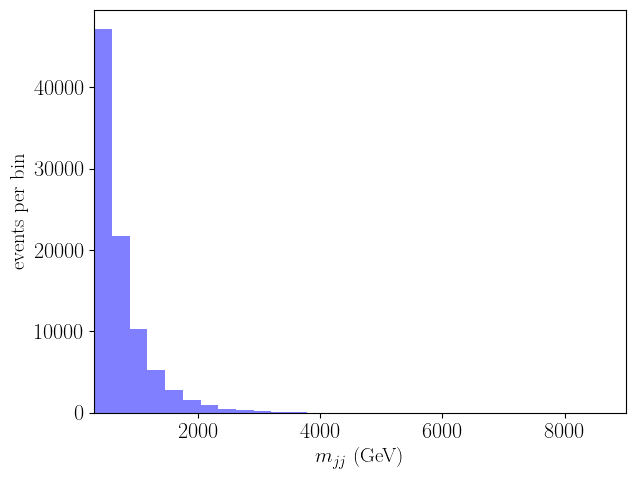

In [16]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(gtot.mass,bins=30,range=(300, 9000),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(300,9000)
plt.tight_layout()
#plt.title(r'$m_{\gamma \gamma}$ ',fontsize=15)
plt.xlabel(r'$m_{jj}$ (GeV)',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mZZ.pdf")
plt.show()

In [17]:
min(y1)

-2.99933194302748

In [18]:
max(y1)

2.998805953712909

In [19]:
max(y2)

2.9979237027502377

In [20]:
# define the events for R1 with 0 < y* < 0.5
ystar_R1 = [ys for ys in ystar if 0 < ys <= 0.5];
mjj_R1 = [gtot.mass[i] for i in range(len(events)) if 0 < ystar[i] <= 0.5];

In [21]:
# define the events for R2 with 0.5 < y* < 1
ystar_R2 = [ys for ys in ystar if 0.5 < ys <= 1];
mjj_R2 = [gtot.mass[i] for i in range(len(events)) if 0.5 < ystar[i] <= 1];

In [22]:
# define the events for R3 with 1 < y* < 1.5
ystar_R3 = [ys for ys in ystar if 1 < ys <= 1.5];
mjj_R3 = [gtot.mass[i] for i in range(len(events)) if 1 < ystar[i] <= 1.5];

In [23]:
# define the events for R4 with 1.5 < y* < 2
ystar_R4 = [ys for ys in ystar if 1.5 < ys <= 2];
mjj_R4 = [gtot.mass[i] for i in range(len(events)) if 1.5 < ystar[i] <= 2];

In [24]:
# define the events for R5 with 2 < y* < 2.5
ystar_R5 = [ys for ys in ystar if 2 < ys <= 2.5];
mjj_R5 = [gtot.mass[i] for i in range(len(events)) if 2 < ystar[i] <= 2.5];

In [25]:
# define the events for R6 with 2.5 < y* < 3
ystar_R6 = [ys for ys in ystar if 2.5 < ys <+ 3];
mjj_R6 = [gtot.mass[i] for i in range(len(events)) if 2.5 < ystar[i] <= 3];

In [26]:
print(len(mjj_R1))
print(len(mjj_R2))
print(len(mjj_R3))
print(len(mjj_R4))
print(len(mjj_R5))
print(len(mjj_R6))

52796
32651
11697
2520
322
14


In [ ]:
max(mjj_R1)

In [ ]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(mjj_R1,bins=30,range=(260,7000),label='$0 < y* < 0.5$', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
n, bins, _ =plt.hist(mjj_R2,bins=30,range=(260,7000),label='$0.5 < y* < 1$', alpha=0.5,density=False,color = "red", ec="k",histtype='stepfilled',log=False)
n, bins, _ =plt.hist(mjj_R3,bins=30,range=(260,7000),label='$1 < y* < 1.5$', alpha=0.5,density=False,color = "green", ec="k",histtype='stepfilled',log=False)
n, bins, _ =plt.hist(mjj_R4,bins=30,range=(260,7000),label='$1.5 < y* < 2$', alpha=0.5,density=False,color = "yellow", ec="k",histtype='stepfilled',log=False)
n, bins, _ =plt.hist(mjj_R5,bins=30,range=(260,7000),label='$2 < y* < 2.5$', alpha=0.5,density=False,color = "orange", ec="k",histtype='stepfilled',log=False)
n, bins, _ =plt.hist(mjj_R6,bins=30,range=(260,7000),label='$2.5 < y* < 3$', alpha=0.5,density=False,color = "purple", ec="k",histtype='stepfilled',log=False)
plt.xlim(260, 7000)
plt.tight_layout()
plt.title(r'$m_{jj}$ for different y*',fontsize=15)
plt.xlabel(r'$m_{jj}$',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
plt.legend()
#plt.savefig("mZZ.pdf")
plt.show()

# Double differential distribution $\frac{d^2 \sigma}{d y* d m_{jj}}$

## Read in data from NNPDF dataset

In [27]:
def parse_dataset(dataset, observable, variant=None):
    metadata_file = path_commondata / dataset / "metadata.yaml"
    metadata = parse_new_metadata(metadata_file, observable, variant=variant)
    return metadata

In [28]:
# read in metadata and commondata
dataset="ATLAS_2JET_13TEV_DIF"
observable = "MJJ-Y"
metadata = parse_dataset(dataset, observable)
cd = load_commondata(metadata)
print(cd)

CommonData(setname='ATLAS_2JET_13TEV_DIF_MJJ-Y', ndata=136, commondataproc='DIJET', nkin=3, nsys=336, legacy=False, legacy_names=None, kin_variables=['ystar', 'm_jj', 'sqrts'])


In [29]:
# get the central values, i.e. the measurement for each bins.
# central_values gives a vector of length ndata which concatenates the bins for different values of y*
# 136 = 28+28+27+24+21+8
data=cd.central_values

In [30]:
for attr in dir(cd):
    if not attr.startswith("__"):
        print(attr)

additive_errors
central_values
commondata_table
commondataproc
export
export_data
export_uncertainties
get_cv
get_kintable
kin_variables
kinematics
legacy
legacy_names
multiplicative_errors
ndata
nkin
nsys
setname
stat_errors
systematic_errors
systematics_table
systype_table
with_central_value
with_cuts


In [31]:
cd.kinematics

,kin1,kin2,kin3
entry,,,
1,0.25,285.0,13000.0
2,0.25,340.0,13000.0
3,0.25,405.0,13000.0
4,0.25,475.0,13000.0
5,0.25,550.0,13000.0
...,...,...,...
132,2.75,3045.0,13000.0
133,2.75,3620.0,13000.0
134,2.75,4285.0,13000.0


In [32]:
mjj_bincenter = cd.kinematics['kin2']

In [33]:
print(data)

entry
1      2262.803310
2       957.009005
3       399.559614
4       170.726264
5        77.356923
          ...     
132       0.116200
133       0.036131
134       0.007508
135       0.000707
136       0.000010
Name: data, Length: 136, dtype: float64


In [34]:
len(data)

136

In [35]:
data_R1=data[0:28];
data_R2=data[28:56];
data_R3=data[56:83];
data_R4=data[83:107];
data_R5=data[107:128];
data_R6=data[128:136];

In [36]:
len(data_R2)

28

In [37]:
data_R2[29]

1993.71337

In [38]:
mjj_bincenter_R1=mjj_bincenter[0:28]
mjj_bincenter_R2=mjj_bincenter[28:56]
mjj_bincenter_R3=mjj_bincenter[56:83]
mjj_bincenter_R4=mjj_bincenter[83:107]
mjj_bincenter_R5=mjj_bincenter[107:128]
mjj_bincenter_R6=mjj_bincenter[128:136]

In [39]:
mjj_bincenter_R1

entry
1      285.0
2      340.0
3      405.0
4      475.0
5      550.0
6      630.0
7      715.0
8      805.0
9      900.0
10    1005.0
11    1120.0
12    1245.0
13    1380.0
14    1525.0
15    1680.0
16    1850.0
17    2030.0
18    2225.0
19    2440.0
20    2665.0
21    2910.0
22    3175.0
23    3460.0
24    3770.0
25    4100.0
26    4455.0
27    4840.0
28    6020.0
Name: kin2, dtype: float64

In [ ]:
# calculate the covariance matrix which is a (ndata, ndata) matrix with the statistical uncertainty and systematical correlation among the bins
covmat= covmat_from_systematics(loaded_commondata_with_cuts=cd,
                                         dataset_input=None,
                                         use_weights_in_covmat=False)

In [60]:
# get the bins directly from HEPdata:
raw_data_R1 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R1.csv', sep=';', nrows=28, header=10).values
#raw_data_R2 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R2.csv', sep=';', nrows=28, header=10).values
#raw_data_R3 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R3.csv', sep=';', nrows=28, header=10).values
#raw_data_R4 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R4.csv', sep=';', nrows=28, header=10).values
#raw_data_R5 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R5.csv', sep=';', nrows=28, header=10).values
#raw_data_R6 = pd.read_csv('../MadGraph/ppaxgg_dijet/data_R6.csv', sep=';', nrows=28, header=10).values

In [42]:
len(raw_data)

28

In [43]:
raw_data[0,0]

285.0

In [61]:
mjj_bincenter_R1 = raw_data_R1[:,0]

In [62]:
mjj_bin_lower_R1=raw_data_R1[:,1];
mjj_bin_upper_R1=raw_data_R1[:,2];
mjj_bins_R1 = np.append(mjj_bin_lower_R1, mjj_bin_upper_R1[-1])

In [47]:
#mjj_bin_lower_R2=raw_data[:,1];
#mjj_bin_upper_R2=raw_data[:,2];
#mjj_bins_R2 = np.append(mjj_bin_lower_R2, mjj_bin_upper_R2[-1])

In [48]:
#mjj_bin_lower_R3=raw_data[:,1];
#mjj_bin_upper_R3=raw_data[:,2];
#mjj_bins_R3 = np.append(mjj_bin_lower_R3, mjj_bin_upper_R3[-1])

In [49]:
#mjj_bin_lower_R4=raw_data[:,1];
#mjj_bin_upper_R4=raw_data[:,2];
#mjj_bins_R4 = np.append(mjj_bin_lower_R4, mjj_bin_upper_R4[-1])

In [50]:
#mjj_bin_lower_R5=raw_data[:,1];
#mjj_bin_upper_R5=raw_data[:,2];
#mjj_bins_R5 = np.append(mjj_bin_lower_R5, mjj_bin_upper_R5[-1])

In [51]:
#mjj_bin_lower_R6=raw_data[:,1];
#mjj_bin_upper_R6=raw_data[:,2];
#mjj_bins_R6 = np.append(mjj_bin_lower_R6, mjj_bin_upper_R6[-1])

In [46]:
mjj_bins_R1

array([260, 310, 370, 440, 510, 590, 670, 760, 850, 950, 1060, 1180, 1310,
       1450, 1600, 1760, 1940, 2120, 2330, 2550, 2780, 3040, 3310, 3610,
       3930, 4270, 4640, 5040, 7000], dtype=object)

In [ ]:
plt.scatter(mjj_bincenter_R1, data_R1, color='black', label='data')

In [ ]:
(data_R1*np.diff(mjj_bins_R1)).sum()

## Read in the background

I deal with the double-differential distribution in y* and m_jj by splitting it into different regions R, given by the bins in y*.

In [ ]:
#Legend:
# R1 with 0 < y* < 0.5
# R2 with 0.5 < y* < 1
# R3 with 1 < y* < 1.5
# R4 with 1.5 < y* < 2
# R5 with 2 < y* < 2.5
# R6 with 2.5 < y* < 3

Currently, I have only read in the data for R1, the are given by:

In [64]:
mjj_bins_R1

array([260, 310, 370, 440, 510, 590, 670, 760, 850, 950, 1060, 1180, 1310,
       1450, 1600, 1760, 1940, 2120, 2330, 2550, 2780, 3040, 3310, 3610,
       3930, 4270, 4640, 5040, 7000], dtype=object)

In [ ]:
# background_R1 = ... should be an array with the number of background events in the bins mjj_bins_R1


## Histogram with signal events in the right binning

In [ ]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins))
n_signal, bins, _ =plt.hist(mjj_R1, bins=mjj_bins_R1,range=(260,7000),label='$0 < y* < 0.5$', alpha=0.5,density=True,color = "red", ec="k",histtype='stepfilled',log=False)
plt.xlim(260, 7000)
plt.tight_layout()
plt.title(r'signal distribution for $m_{jj}$ for $0 < y* < 0.5 $',fontsize=15)
plt.xlabel(r'$m_{jj}$',fontsize=15)
plt.ylabel(r'Normalized distributions',fontsize=15)
#plt.savefig("mHHdist.pdf")
plt.show()

In [ ]:
(n_signal*np.diff(mjj_bins_R1)).sum()

ATLAS gives the data and background in events per bin and per bin width normalised by the total cross section, meaning that we do not have to multiply with the bin width to compare the signal, but with the measured cross section.

## Compare signal with data and background


In [ ]:
# we don't have the background yet, we needed some N^nLO simulations with some grids?
# for the experimental uncertainty, we need to evaluate the covariance matrix

In [ ]:
# rescale the MG5 signal events to compare with the data: N_events = n_events * L * sigma * acc
# acc = acceptence to the phase space cuts = number of events that pass the cuts / number of all events
# sigma in lhe file: total cross section including BR (unless we generate the process with decaying the Higgses or Z), sigma in pb
# cross check with more severe cuts that sigma * acc is the same

# careful! the lumi is given in fb, and so is the differential cross section. 
# So we need the cross section from MadGraph in fb as well, which explains the additional factor of 1000.
lumi = 3.2
delta_y = 0.5 # width of the y* bins
acc = 1  # not post-selection cuts
#N_events = n_signal * lumi * sigma 
# the total experimental cross section is around 360 fb, the ALP signal cross section 2.7 pb, so almost a factor 10 higher

In [ ]:
plt.bar(bins[:-1], n_signal*sigma*lumi*1000, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal ( + BG)')
#plt.bar(bins[:-1], n_norm*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], background*lumi, width=np.diff(bins), align='edge', alpha=1, color='royalblue',label='SM background')
plt.xlim(260, 7000)
#plt.ylim(0,10000)
plt.xlabel('$m_{jj}$',fontsize=15)
plt.ylabel('Number of events',fontsize=15)
#plt.errorbar(mjj_bin_center, data*lumi, data_unc*lumi, color='black', alpha=1,fmt='none')
plt.scatter(mjj_bincenter_R1, data_R1*lumi*delta_y, color='black', label='ATLAS data')
plt.legend()
plt.title(r"$ALP \rightarrow gg$ in $m_{jj}$")
plt.tight_layout()
#plt.savefig("/Users/esser/Documents/PROJECTS/ALPsPheno/ALP GLOBAL/Figures/gg_dijet.pdf")
plt.show()

### Output data to Mathematica

In [ ]:
# data
Mathematica_data = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data_R1]) + "}" + ";"
print(Mathematica_data)